**NOTE:** You probably will see warnings. These are not errors! However, you should read them and try to understand why they're there. Can you fix them?

![](http://rentinginla.com/wp-content/uploads/2015/12/Buying.jpg)
# [Project 2: Predicting House Prices with Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

The goal of this project is for you to use EDA, visualization, data cleaning, preprocesing, and linear models to predict home prices given the features of the home, and interpret your linear models to find out what features add value to a home! This project is a bit more open-ended than project 1. 

Be sure to ...

* Think about your choices when it comes to your choices about the data. Be ready to defend your decisions!
* Use lots of plots to dig deeper into the data! Describe the plots and convey what you learned from them.
* Don't forget to read the [description of the data](../data_description.txt) (also available at the kaggle website)! This has valuable information that will help you clean and impute data. `NaN` means something in many of the columns! Don't just drop or fill them!
* Try fitting many models! Document your work and note what you've tried.
* Apply what you've learned in class, books, videos, Kaggle forums, and blog posts. There have been a TON of blog posts about this;  you should seek them out and read them!


From the Kaggle competition website:

    Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

    With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from IPython.display import display

%matplotlib inline 
np.random.seed(42)

## 1. Load the Data 

* The data comes in three separate CSVs located in `../data/`. 
* Load the CSV into a `DataFrame`. 
* Make sure to check the `.head` or `.sample`. How many rows? How many columns?
* Familiarize yourself with the column names and what they represent.
* Is there a column that can be set as the `index`? If so, set that column as the index when loading the data. (`df.set_index()`)

In [217]:
df = pd.read_csv('/home/jovyan/src/Project_2_housing/data/train.csv', index_col='Id')

**Bonus:** Write an assertion statement to programmatically verify the correct number of rows and columns were imported.

In [218]:
rows = 0
cols = []
with open('/home/jovyan/src/Project_2_housing/data/train.csv') as f:
    for row in f:
        rows += 1
        cols.append(len(row.split(',')))
(rows == len(df)+1) & (np.unique(cols) == len(df.columns)+1)

array([ True], dtype=bool)

## 2. Exploratory Data Analysis (EDA)

### A. Data Types

Read the data description on Kaggle. Which variables are numerical and categorical? Are there any columns that can be deleted? 

Make sure the `dtype` of each column is correct. 

**NOTE:** There is one column in particular that should be categorical but will load in pandas as numeric.

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [219]:
df.MSSubClass = df.MSSubClass.astype('object')

In [220]:
df_nums = df.select_dtypes(include=['int64', 'float64'])

### B. Plot histograms of the numeric columns. 

In [188]:
# PLOTTING FUNCTION

def house_hist(df=df_nums, rows=18, cols=2):
    fig, axes = plt.subplots(rows, cols, figsize=(20,100))
    label = list(df.columns)
    i = 0
    for row in range(axes.shape[0]):
        for col in range(axes.shape[1]):
            ax = axes[row][col]
            df[label[i]].hist(ax=ax)
            ax.set_title(label[i])
            i += 1
    plt.tight_layout()

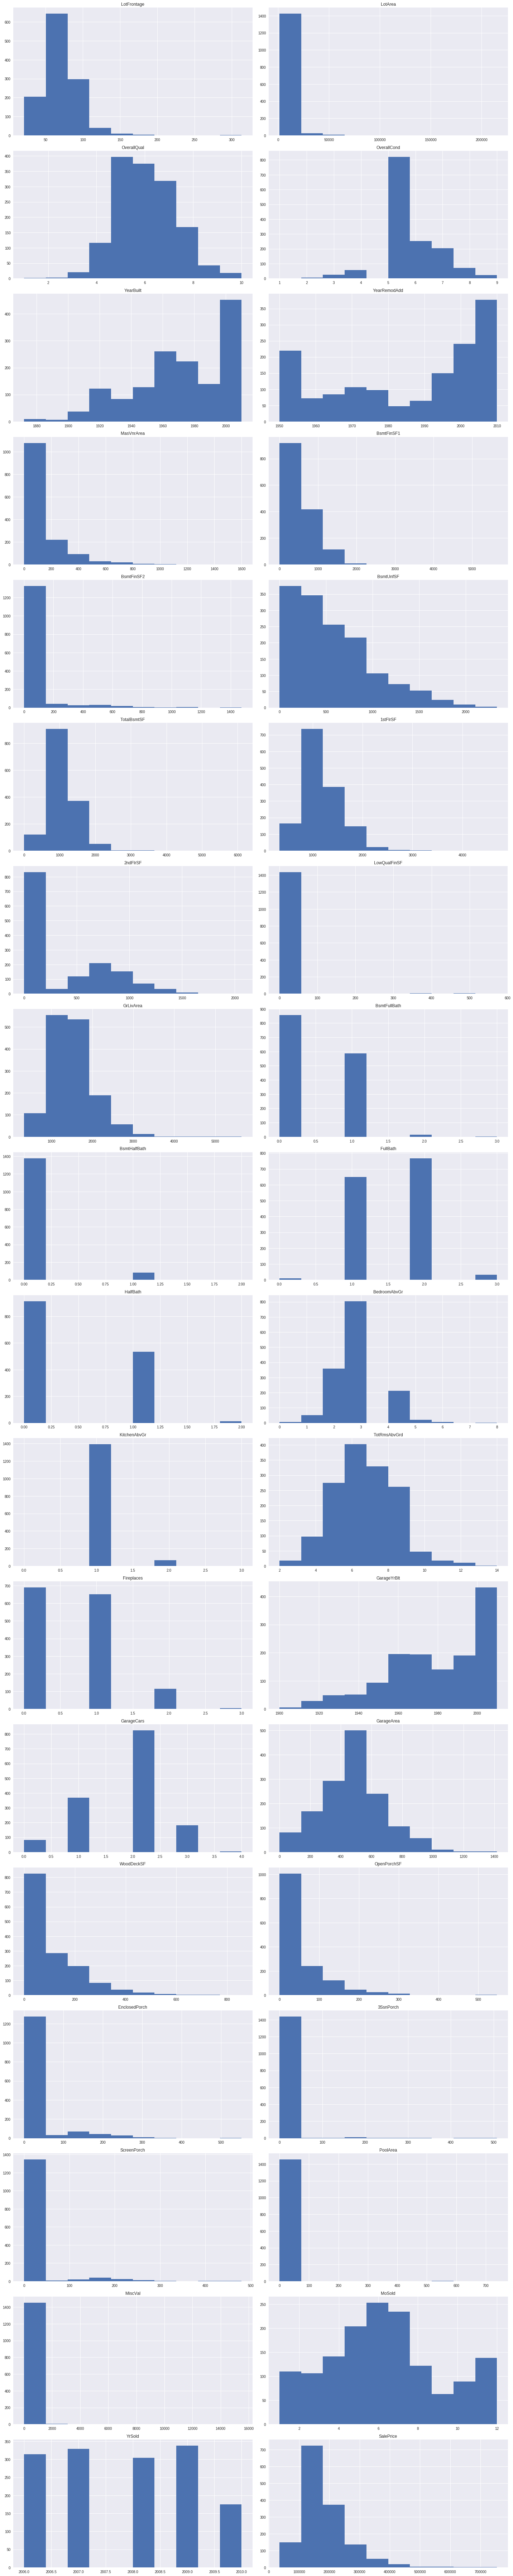

In [189]:
house_hist()

#### What are your observations? Add them to this markdown cell.

---

Many fields have high counts of 0, representing missing features. Some fields have outliers, and almost no fields distribution that appears normal.

### C. Plot the Numeric Columns Against `SalePrice` using scatter plots.

In [190]:
# PLOTTING FUNCTION

def house_scatter(df=df_nums, rows=18, cols=2):
    fig, axes = plt.subplots(rows, cols, figsize=(20,100))
    label = list(df.columns)
    i = 0
    for row in range(axes.shape[0]):
        for col in range(axes.shape[1]):
            ax = axes[row][col]
            df.plot(x=label[i], y='SalePrice', ax=ax, kind='scatter')
            ax.set_title(label[i])
            i += 1
    plt.tight_layout()

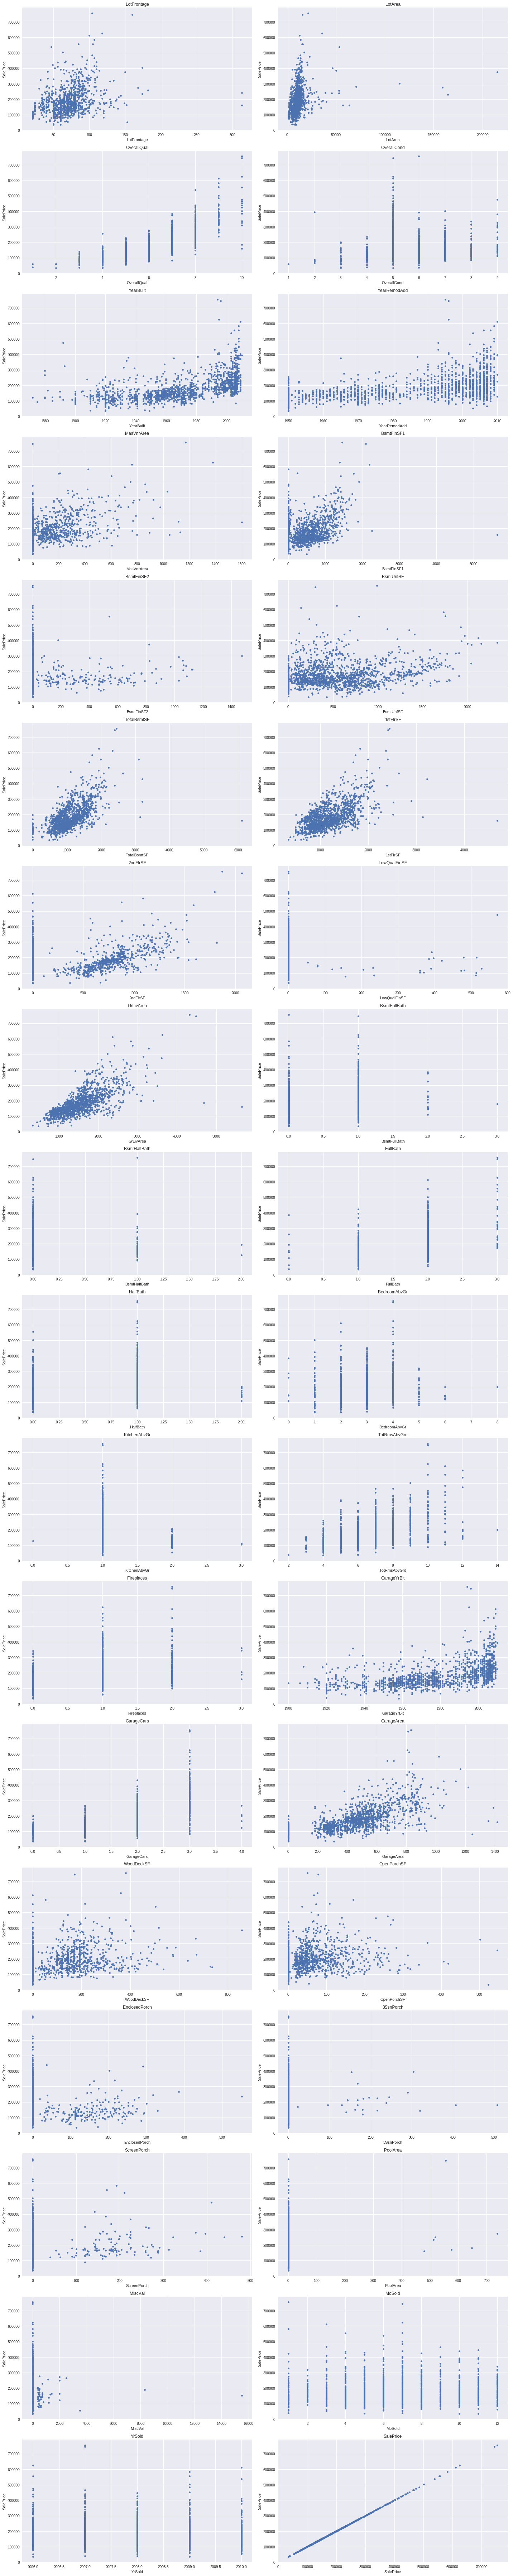

In [191]:
house_scatter()

#### What are your observations? Add them to this markdown cell.

---

Some clear outliers are present in LotFrontage, LotArea, and TotalBsmtSF. Many of the continuous variables appear to have linear relationships with price.

### D. Use bar plots to plot categorical features against `SalePrice`. 

**HINT:** Look up how to create bar plots in `matplotlib`. You will have to transform the data before you can create a bar plot! Also, look up [how to plot error bars](https://pandas.pydata.org/pandas-docs/stable/visualization.html#plotting-with-error-bars) so you can also observe the variability in your data!

In [192]:
# PLOTTING FUNCTION

def house_bar(df=df, rows=22, cols=2):
    fig, axes = plt.subplots(rows, cols, figsize=(20,140))
    label = list(df.select_dtypes(include=['object']).columns)
    i = 0
    for row in range(axes.shape[0]):
        for col in range(axes.shape[1]):
            ax = axes[row][col]
            df.groupby(label[i])['SalePrice'].mean().plot.bar(yerr=df.groupby(label[i])
                                                              ['SalePrice'].std(),
                                                              ax = ax)
            ax.set_title(label[i])
            i += 1
    plt.tight_layout()

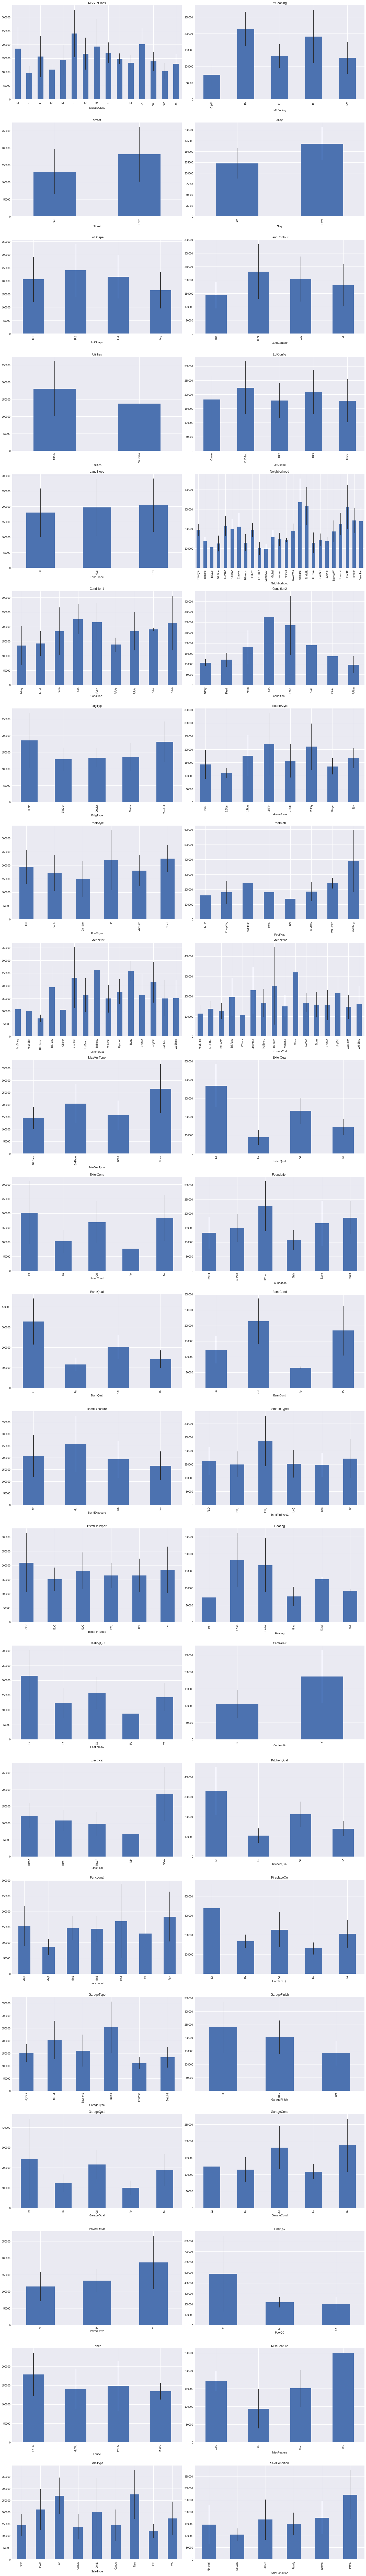

In [193]:
house_bar()

#### What are your observations? Add them to this markdown cell.

---


There are few bar plots where the error bars for a category aren't very broad, so even when a mean for a certain feature value seems to suggest a high/low price, this relationship isn't necessarily highly predictive.

## 3. Preprocessing

### A. Identify and Remove Outliers for `SalePrice`

Make sure to... 
* Plot a histogram of the housing price. 
* Supply a definition of what an outlier is by your criteria. Does Tukey's method make sense with 1.5 times the interquartile range, or should that range be increased or decreased?
* Use masking to remove the outliers as you've defined them.

In [194]:
price_iqr = np.percentile(df['SalePrice'], [25, 75])
for threshold in [1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5]:
    upper_fence = float(price_iqr[1] + threshold*np.diff(price_iqr))
    print('Threshold at {}({}): {} ({} houses)'.format(threshold, upper_fence,\
                                       np.mean(df['SalePrice'] >= upper_fence), \
                                       sum(df['SalePrice'] >= upper_fence)))

Threshold at 1.5(340037.5): 0.04178082191780822 (61 houses)
Threshold at 1.75(361043.75): 0.03493150684931507 (51 houses)
Threshold at 2(382050.0): 0.026027397260273973 (38 houses)
Threshold at 2.25(403056.25): 0.017123287671232876 (25 houses)
Threshold at 2.5(424062.5): 0.014383561643835616 (21 houses)
Threshold at 2.75(445068.75): 0.010273972602739725 (15 houses)
Threshold at 3(466075.0): 0.00821917808219178 (12 houses)
Threshold at 3.25(487081.25): 0.0061643835616438354 (9 houses)
Threshold at 3.5(508087.5): 0.005479452054794521 (8 houses)


**Setting threshold at** $$3*IQR$$

In [221]:
df = df[df['SalePrice'] < 466075]

Round outliers down to determined bounds (based on visual analysis)

In [222]:
df.TotalBsmtSF.mask(df['TotalBsmtSF'] > 3500, 3500, inplace=True) 
df.LotArea.mask(df['LotArea'] > 50000, 50000, inplace=True)
df.LotFrontage.mask(df['LotFrontage'] > 200, 200, inplace=True) 

### B. Fill missing data!

* How many null values are in each column? Make a bar plot showing this only for columns with missing data.
* For each column with nulls, do nulls represent anything? Read the data description.
  * Some columns that are appearing as _null_ might legitimately be known (ie: "na").  Double check the [data description](../data_description.txt) for proper value representation.  A feature might actually be better represented by "not available" or "na" rather than `NULL` or `NaN`.  There's a difference between `NULL` (unknown), and "NA" (not available).  It might mean the difference between "there isn't a garage" and "there is no garage data". 
* Fill null values for each column by imputation. Here are some common methods for imputation:
  1. Using domain knowledge to select an appropriate value.
  1. Value from a randomly selected row.
  2. Mean, median, or mode value of the series.
  3. Value estimated by a predictive model.
* Make sure to justify your method for filling null values.
  

In [197]:
[column for column in df.columns if np.sum(df[column].isnull()) > 0]

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

**Missing values for Masonary Veneer Area are all houses with NA for Masonary Veneer, so these are filled in with 0 and None, respectively. Missing values for Garage Year Built are houses without garages, so these are filled in with the year the house was built, as this follows the pattern established in the dataset. Missing LotFrontage values are an anomaly, so these are filled in with the mean. The single missing value in Electrical is also anomalous, so is filled with the most frequent value, SBrkr. All other missing values represent the absence of the encoded feature, and so are filled with NA.**

In [223]:
df.Alley.fillna('NA', inplace=True)
df.MasVnrType.fillna('None', inplace=True)
df.MasVnrArea.fillna(0, inplace=True)
df.BsmtQual.fillna('NA', inplace=True)
df.BsmtCond.fillna('NA', inplace=True)
df.BsmtExposure.fillna('NA', inplace=True)
df.BsmtFinType1.fillna('NA', inplace=True)
df.BsmtFinType2.fillna('NA', inplace=True)
df.Electrical.fillna('SBrkr', inplace=True)
df.FireplaceQu.fillna('NA', inplace=True)
df.GarageType.fillna('NA', inplace=True)
df.GarageFinish.fillna('NA', inplace=True)
df.GarageQual.fillna('NA', inplace=True)
df.GarageCond.fillna('NA', inplace=True)
df.PoolQC.fillna('NA', inplace=True)
df.Fence.fillna('NA', inplace=True)
df.MiscFeature.fillna('NA', inplace=True)
df.LotFrontage.fillna(df.LotFrontage.mean(), inplace=True)
df.GarageYrBlt.fillna(df.YearBuilt, inplace=True)

Verify that you have *truly* eliminated all the null values!

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1448 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1448 non-null object
MSZoning         1448 non-null object
LotFrontage      1448 non-null float64
LotArea          1448 non-null int64
Street           1448 non-null object
Alley            1448 non-null object
LotShape         1448 non-null object
LandContour      1448 non-null object
Utilities        1448 non-null object
LotConfig        1448 non-null object
LandSlope        1448 non-null object
Neighborhood     1448 non-null object
Condition1       1448 non-null object
Condition2       1448 non-null object
BldgType         1448 non-null object
HouseStyle       1448 non-null object
OverallQual      1448 non-null int64
OverallCond      1448 non-null int64
YearBuilt        1448 non-null int64
YearRemodAdd     1448 non-null int64
RoofStyle        1448 non-null object
RoofMatl         1448 non-null object
Exterior1st      1448 non-null object
Exterior2nd      1448 n

### C. Create dummy variables for categorical columns

Use `pd.get_dummies()` to turn your categorical features into numeric features. Make sure there are **no null values** in your dataset before you do this!

In [224]:
df_dummy = pd.get_dummies(df)

### C2. Combine and Compose variables

Use observations of data to combine and reduce features

In [225]:
df_comp = df[['SalePrice']]

In [226]:
## Combine all porches to get total SF
df['Porch_TotalSF'] = df['ScreenPorch'] + df['3SsnPorch'] + df['EnclosedPorch'] \
                        + df['OpenPorchSF'] + df['WoodDeckSF']

df['TotalBaths'] = df.FullBath + .5*df.HalfBath    
    

df_comp['2Story'] = df['2ndFlrSF'] != 0

df_comp['Artery_Street'] = (df_dummy['Condition1_Artery'] | df_dummy['Condition2_Artery'])

df_comp['Feeder_Street'] = (df_dummy['Condition1_Feedr'] | df_dummy['Condition2_Feedr'])

df_comp['RR'] = (df_dummy['Condition1_RRAe'] | df_dummy['Condition2_RRAe'] |
                 df_dummy['Condition1_RRAn'] | df_dummy['Condition2_RRAn'] |
                 df_dummy['Condition1_RRNe'] | df_dummy['Condition1_RRNn'] | 
                                               df_dummy['Condition2_RRNn'])

df_comp['Near_Park'] = (df_dummy['Condition1_PosA'] | df_dummy['Condition2_PosA'] |
                        df_dummy['Condition1_PosN'] | df_dummy['Condition2_PosN'])

df_comp['Pool'] = (df_dummy['PoolQC_Ex'] | df_dummy['PoolQC_Fa'] |
                   df_dummy['PoolQC_Gd'])

df_comp['Shed'] = df_dummy['MiscFeature_Shed']

df_comp['Garage_Good'] = (df_dummy['GarageQual_Ex'] | df_dummy['GarageQual_Gd'] |
                          df_dummy['GarageCond_Ex'] | df_dummy['GarageCond_Gd'] )

df_comp['Garage_Poor'] = (df_dummy['GarageQual_Fa'] | df_dummy['GarageQual_Po'] |
                          df_dummy['GarageCond_Fa'] | df_dummy['GarageCond_Po'] )

df_comp['Garage_Average'] = ((df_comp['Garage_Good'] | df_comp['Garage_Poor'] 
                            | df_dummy['GarageQual_NA']) == 0) * 1

df_comp['Neighborhood_NPk/Blueste'] = (df_dummy['Neighborhood_Blueste'] | df_dummy['Neighborhood_NPkVill'])

df_comp['LotConfig_FR2+'] = (df_dummy['LotConfig_FR2'] | df_dummy['LotConfig_FR3'])

df_comp['LotShape_IR2+'] = (df_dummy['LotShape_IR2'] | df_dummy['LotShape_IR3'])

### C3. Drop Redundant columns

Reducing features

Remove some variables from original DataFrame

In [227]:
df.drop(['GarageQual', 'GarageCond', 'MiscFeature', 'PoolQC', 'Condition1', 'Condition2',
         'FullBath', 'HalfBath', 'ScreenPorch', '3SsnPorch', 'EnclosedPorch', 'OpenPorchSF',
         'WoodDeckSF', '2ndFlrSF'], axis=1, inplace=True)

Recast with dummy inplace (notice reduced dimensionality)

In [228]:
df = pd.get_dummies(df)

Remove the redundant/modified dummy columns

In [229]:
df.drop(['LotShape_IR2', 'LotShape_IR3', 'LotConfig_FR2', 'LotConfig_FR3',
         'Neighborhood_Blueste', 'Neighborhood_NPkVill'], axis=1, inplace=True)

Add back in composite features.

In [230]:
df = df.merge(df_comp.drop('SalePrice', axis=1), left_index=True, right_index=True)

In [231]:
df.shape

(1448, 280)

### D. Split your data into a train and test set.

* Use `train_test_split` to hold out a test set. 
* Why do we hold out a test set?

In [232]:
y = df['SalePrice']

In [233]:
X = df.drop('SalePrice', axis=1)

In [234]:
from sklearn.model_selection import train_test_split

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

We hold out a test set because we need to understand how our model performs on data it hasn't seen. We may create a model that fits our training data very well but does not score well on the test set, suggesting that it won't predict well given new data. With a test set, we can understand how our model performs on unseen data.

### E. Scale the data

Make sure to...
* instantiate a `StandardScaler` object
* `fit` the scaler on your training data
* `transform` both your training and test data.

In [236]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4. Modeling

Now that you've completed your EDA, you can now use your training data to build a model to predict home price from your features! As far as regression methods, you've learned a few, including ordinary least squares (a.k.a. `LinearRegression`), `Lasso`, `Ridge`, and `ElasticNet`. 

### A. Benchmarking

As we get started with modeling we should have some basis for comparison to get a sense of what a "good" model is for this task. 

For this task, as we will be focusing on linear models, we will use the most naive of the linear models, the Linear Regression as our benchmark. 

In [237]:
from sklearn.linear_model import LinearRegression

#### Results Dictionary

Make a results `list` to hold your results. After each model fit and score, you will add a dictionary of your results to this list using `.append()`. This will give you a list of dictionaries ... perfect for a DataFrame!

#### Make a new results list.

In [238]:
results = list()

#### Raw Benchmark

Instantiate a new `LinearRegression` model and save it as `benchmark_raw`.

In [239]:
benchmark_raw = LinearRegression()

- Fit the `benchmark_raw` model against the raw training data. 
- Score the `benchmark_raw` model against both the raw training set and the raw testing set. 
- Apprend a results dictionary to the `results` list. 

You could do this by

    results.append({'name':'benchmark',
                    'model': benchmark_raw,
                    'dataset' : 'train',
                    'preprocessing': 'raw',
                    'score': raw_train_score})
                    
Of course you can store a model in a dictionary!                    

In [240]:
benchmark_raw.fit(X_train, y_train)
raw_train_score = benchmark_raw.score(X_train, y_train)
raw_test_score = benchmark_raw.score(X_test, y_test)

results.append({'name':'benchmark',
                'model':benchmark_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': raw_train_score})
results.append({'name':'benchmark',
                'model':benchmark_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': raw_test_score})

#### Scaled Benchmark

- Fit the `benchmark_scaled` model against the scaled training data. 
- Score the `benchmark_scaled` model against both the scaled training set and the scaled testing set. 
- Write the results to the results `list`. 

In [241]:
benchmark_scaled = LinearRegression()
benchmark_scaled.fit(X_train_scaled, y_train)
scaled_train_score = benchmark_scaled.score(X_train_scaled, y_train)
scaled_test_score = benchmark_scaled.score(X_test_scaled, y_test)

results.append({'name':'benchmark',
                'model':benchmark_scaled,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': scaled_train_score})
results.append({'name':'benchmark',
                'model':benchmark_scaled,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': scaled_test_score})

Use a DataFrame to display your results.

In [242]:
pd.DataFrame(results)

,dataset,model,name,preprocessing,score
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,9.297391e-01
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,8.583311e-01
2,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,9.297392e-01
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,-2.862155e+19


#### What are your observations? Add them to this markdown cell.

Something went wrong with my sclaed LinearRegression for my test data, but from the raw data it would APPEAR that the model is not overfit.


### B. Naive Regularization

Next, prepare a series of fits using the three regularized linear regression models with their default settings.

Perform each of these against both the raw and the scaled data. In this section, you should be fitting six models.

- A naive Ridge Regression against the raw data
- A naive Lasso Regression against the raw data
- A naive ElasticNet Regression against the raw data
- A naive Ridge Regression against the scaled data
- A naive Lasso Regression against the scaled data
- A naive ElasticNet Regression against the scaled data

**NOTE:** By "naive" we mean using all of the default settings.

In [243]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [244]:
ridge_raw = Ridge()

ridge_raw.fit(X_train, y_train)
ridge_raw_train_score = ridge_raw.score(X_train, y_train)
ridge_raw_test_score = ridge_raw.score(X_test, y_test)

results.append({'name':'ridge',
                'model':ridge_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': ridge_raw_train_score})
results.append({'name':'ridge',
                'model':ridge_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': ridge_raw_test_score})

ridge_scaled = Ridge()

ridge_scaled.fit(X_train_scaled, y_train)
ridge_scaled_train_score = ridge_scaled.score(X_train_scaled, y_train)
ridge_scaled_test_score = ridge_scaled.score(X_test_scaled, y_test)

results.append({'name':'ridge',
                'model':ridge_scaled,
                'dataset' : 'train',
                'preprocessing': 'sca;ed',
                'score': ridge_scaled_train_score})
results.append({'name':'ridge',
                'model':ridge_scaled,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': ridge_scaled_test_score})

In [245]:
lasso_raw = Lasso()

lasso_raw.fit(X_train, y_train)
lasso_raw_train_score = lasso_raw.score(X_train, y_train)
lasso_raw_test_score = lasso_raw.score(X_test, y_test)

results.append({'name':'lasso',
                'model':lasso_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': lasso_raw_train_score})
results.append({'name':'lasso',
                'model':lasso_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': lasso_raw_test_score})

lasso_scaled = Lasso()

lasso_scaled.fit(X_train_scaled, y_train)
lasso_scaled_train_score = lasso_scaled.score(X_train_scaled, y_train)
lasso_scaled_test_score = lasso_scaled.score(X_test_scaled, y_test)

results.append({'name':'lasso',
                'model':lasso_scaled,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': lasso_scaled_train_score})
results.append({'name':'lasso',
                'model':lasso_scaled,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': lasso_scaled_test_score})

In [246]:
elastic_raw = ElasticNet()

elastic_raw.fit(X_train, y_train)
elastic_raw_train_score = elastic_raw.score(X_train, y_train)
elastic_raw_test_score = elastic_raw.score(X_test, y_test)

results.append({'name':'elastic',
                'model':elastic_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': elastic_raw_train_score})
results.append({'name':'elastic',
                'model':elastic_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': elastic_raw_test_score})

elastic_scaled = ElasticNet()

elastic_scaled.fit(X_train_scaled, y_train)
elastic_scaled_train_score = elastic_scaled.score(X_train_scaled, y_train)
elastic_scaled_test_score = elastic_scaled.score(X_test_scaled, y_test)

results.append({'name':'elastic',
                'model':elastic_scaled,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': elastic_scaled_train_score})
results.append({'name':'elastic',
                'model':elastic_scaled,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': elastic_scaled_test_score})

Note that we see warnings here. As we are in an exploration phase with our model, this is acceptable.

Use a DataFrame to store your `results` as `results_df`. By this we mean, save the `results` list into a new dataframe so that you can manipulate the DataFrame.

In [247]:
results_df = pd.DataFrame(results)

#### Display just the raw test results using pandas

You can do this using pandas indexing as follows

    results_df[(results_df.preprocessing == 'raw') & 
               (results_df.dataset == 'test')]

In [248]:
results_df[(results_df.preprocessing == 'raw') & 
           (results_df.dataset == 'test')]

,dataset,model,name,preprocessing,score
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,0.858331
5,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,raw,0.870750
9,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",lasso,raw,0.861314
13,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",elastic,raw,0.851152


#### What are your observations? Add them to this markdown cell.

---

All the models perform similarly.


#### Display just the scaled test results

In [249]:
results_df[(results_df.preprocessing == 'scaled') & 
           (results_df.dataset == 'test')]

,dataset,model,name,preprocessing,score
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,-2.862155e+19
7,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,scaled,8.586866e-01
11,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",lasso,scaled,8.588363e-01
15,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",elastic,scaled,8.719342e-01


#### What are your observations? Add them to this markdown cell.

---

All of the models perform similarly (other than the very negative score coming from the benchmark). The scaled scores are very similar to the raw scores.


These are your benchmark results. You will refer to these for analysis during the next phase.

#### Display just the Benchmark models

In [250]:
results_df[(results_df.name == 'benchmark')]

,dataset,model,name,preprocessing,score
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,9.297391e-01
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,8.583311e-01
2,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,9.297392e-01
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,-2.862155e+19


#### Display just the Ridge models

In [251]:
results_df[(results_df.name == 'ridge')]

,dataset,model,name,preprocessing,score
4,train,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,raw,0.928447
5,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,raw,0.870750
6,train,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,sca;ed,0.929721
7,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,scaled,0.858687


#### Display just the Lasso models

In [252]:
results_df[(results_df.name == 'lasso')]

,dataset,model,name,preprocessing,score
8,train,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",lasso,raw,0.929707
9,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",lasso,raw,0.861314
10,train,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",lasso,scaled,0.929739
11,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",lasso,scaled,0.858836


#### Display just the Elasticnet models

In [253]:
results_df[(results_df.name == 'elastic')]

,dataset,model,name,preprocessing,score
12,train,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",elastic,raw,0.873379
13,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",elastic,raw,0.851152
14,train,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",elastic,scaled,0.909979
15,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",elastic,scaled,0.871934


#### What are your observations? Add them to this markdown cell.

---



### C. Cross-validated models

Import the Cross-Validation Models for each of the Regularized Linear Models

In [254]:
cv_results = list()

In [255]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

Perform the cross-validation using an `np.logspace(-2,4,7)`.

In [256]:
ridgecv_raw = RidgeCV(np.logspace(-2,4,7), cv=5)

ridgecv_raw.fit(X_train, y_train)
ridgecv_raw_train_score = ridgecv_raw.score(X_train, y_train)
ridgecv_raw_test_score = ridgecv_raw.score(X_test, y_test)

cv_results.append({'name':'ridge',
                'model':ridgecv_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'alpha' : ridgecv_raw.alpha_,
                'score': ridgecv_raw_train_score})
cv_results.append({'name':'ridge',
                'model':ridgecv_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'alpha' : ridgecv_raw.alpha_,
                'score': ridgecv_raw_test_score})

ridgecv_scaled = RidgeCV(np.logspace(-2,4,7), cv=5)

ridgecv_scaled.fit(X_train_scaled, y_train)
ridgecv_scaled_train_score = ridgecv_scaled.score(X_train_scaled, y_train)
ridgecv_scaled_test_score = ridgecv_scaled.score(X_test_scaled, y_test)

cv_results.append({'name':'ridge',
                'model':ridgecv_scaled,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'alpha' : ridgecv_scaled.alpha_,
                'score': ridgecv_scaled_train_score})
cv_results.append({'name':'ridge',
                'model':ridgecv_scaled,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'alpha' : ridgecv_scaled.alpha_,
                'score': ridgecv_scaled_test_score})

In [257]:
lassocv_raw = LassoCV(alphas=np.logspace(-2,4,7), cv=5)

lassocv_raw.fit(X_train, y_train)
lassocv_raw_train_score = lassocv_raw.score(X_train, y_train)
lassocv_raw_test_score  = lassocv_raw.score(X_test, y_test)

cv_results.append({'name':'lasso',
                'model':lassocv_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'alpha' : lassocv_raw.alpha_,
                'score': lassocv_raw_train_score})
cv_results.append({'name':'lasso',
                'model':lassocv_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'alpha' : lassocv_raw.alpha_,
                'score': lassocv_raw_test_score})

lassocv_scaled = LassoCV(alphas=np.logspace(-2,4,7), cv=5)

lassocv_scaled.fit(X_train_scaled, y_train)
lassocv_scaled_train_score = lassocv_scaled.score(X_train_scaled, y_train)
lassocv_scaled_test_score  = lassocv_scaled.score(X_test_scaled, y_test)

cv_results.append({'name':'lasso',
                'model':lassocv_scaled,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'alpha' : lassocv_scaled.alpha_,
                'score': lassocv_scaled_train_score})
cv_results.append({'name':'lasso',
                'model':lassocv_scaled,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'alpha' : lassocv_scaled.alpha_,
                'score': lassocv_scaled_test_score})

In [258]:
elasticcv_raw = ElasticNetCV(alphas=np.logspace(-2,4,7), cv=5)

elasticcv_raw.fit(X_train, y_train)
elasticcv_raw_train_score = elasticcv_raw.score(X_train, y_train)
elasticcv_raw_test_score  = elasticcv_raw.score(X_test, y_test)

cv_results.append({'name':'elastic',
                'model':elasticcv_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'alpha' : elasticcv_raw.alpha_,
                'score': elasticcv_raw_train_score})
cv_results.append({'name':'elastic',
                'model':elasticcv_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'alpha' : elasticcv_raw.alpha_,
                'score': elasticcv_raw_test_score})

elasticcv_scaled = ElasticNetCV(alphas=np.logspace(-2,4,7), cv=5)

elasticcv_scaled.fit(X_train_scaled, y_train)
elasticcv_scaled_train_score = elasticcv_scaled.score(X_train_scaled, y_train)
elasticcv_scaled_test_score  = elasticcv_scaled.score(X_test_scaled, y_test)

cv_results.append({'name':'elastic',
                'model':elasticcv_scaled,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'alpha' : elasticcv_scaled.alpha_,
                'score': elasticcv_scaled_train_score})
cv_results.append({'name':'elastic',
                'model':elasticcv_scaled,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'alpha' : elasticcv_scaled.alpha_,
                'score': elasticcv_scaled_test_score})

In [259]:
cv_results_df = pd.DataFrame(cv_results)

#### Display just the raw test results

In [260]:
cv_results_df[(cv_results_df.preprocessing == 'raw') & 
              (cv_results_df.dataset == 'test')]

,alpha,dataset,model,name,preprocessing,score
1,10.00,test,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",ridge,raw,0.880006
5,100.00,test,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",lasso,raw,0.879626
9,0.01,test,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",elastic,raw,0.878595


#### Display just the scaled test results

In [261]:
cv_results_df[(cv_results_df.preprocessing == 'scaled') & 
              (cv_results_df.dataset == 'test')]

,alpha,dataset,model,name,preprocessing,score
3,100.0,test,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",ridge,scaled,0.870650
7,1000.0,test,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",lasso,scaled,0.874194
11,1.0,test,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",elastic,scaled,0.871934


### D. Model Selection

Interpret Regression Metrics for each of your models. Choose one of the following:

* **R2**
* MSE / RMSE
* MAE

What are your top 3 performing models? 

In [264]:
cv_results_df[cv_results_df['dataset']=='test'].sort_values('score', ascending=False).head(6)

,alpha,dataset,model,name,preprocessing,score
1,10.00,test,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",ridge,raw,0.880006
5,100.00,test,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",lasso,raw,0.879626
9,0.01,test,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",elastic,raw,0.878595
7,1000.00,test,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",lasso,scaled,0.874194
11,1.00,test,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",elastic,scaled,0.871934
3,100.00,test,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",ridge,scaled,0.870650


**Presumably, my scaled models SHOULD be performing better, and are only marginally different from my raw models, so I will proceed forward as if they were higher.**

## Explain the bias / variance tradeoff

Why do regularized models perform better on your test set?

Models with greater regularization are less succeptible to overfitting because larger beta values are punished.

### Interpreting coefficients

For your best model, 

* plot relevant coefficients using the `plot_coef` functoin.


In [265]:
def plot_coef(model, top_n = 10):
    '''
    Plots the magnitude of top and bottom n coefficients
    '''
    cols = X_train.columns
    coef = model.coef_
    zipped = list(zip(cols, coef))
    zipped.sort(key=lambda x: x[1], reverse = True)
    top_10 = pd.DataFrame(zipped).head(top_n)
    bottom_10 = pd.DataFrame(zipped).tail(top_n)
    return pd.concat([top_10, bottom_10], axis=0).plot.barh(x = 0, y = 1)

#### Plot your coefficients.

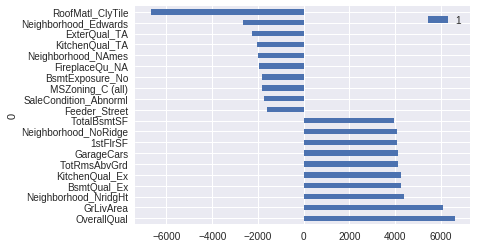

In [266]:
plot_coef(elasticcv_scaled)

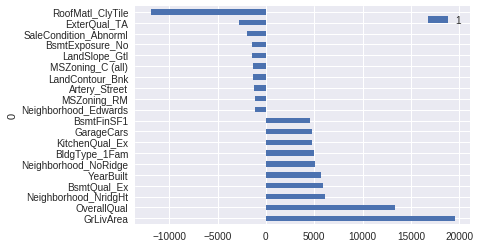

In [267]:
plot_coef(lassocv_scaled)

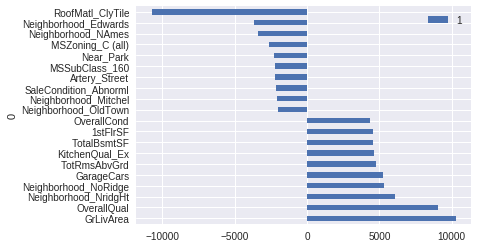

In [268]:
plot_coef(ridgecv_scaled)

#### Which features add / take away most value from a home?

Positive: OverallQual, GrLivArea, BsmtQual_Ex, KitchenQual_Ex, GarageCars, YearBuilt, TotRmsAbvGrd, OverallCond, BldgType_1Fm, Neighborhood_NoRidge, Neighborhood_NridgeHt

Negative: ExterQual_TA, FireplaceQu_NA, KitchenQual_TA, BsmtExposure_No, RoofMatl_ClyTile, Neighborhood_Edwards, Neighborhood_NAmes

# (Optional) Informing Business Value

Interpreting our work for a non-technical audience is a vital skill that every good Data Scientist must cultivate.  At the end of the day, our work must be informative to business process so connecting our detailed efforts to a high level strategy is critical.

We've established a few businesses cases that you should assert some explanation and advise best strategy through a model of your choice.  Also call out any exploratory analysis and reasoning for any recommendation.

##### For each question:
* Plot relevant data
* Fit a new model or use a previous  model
* Plot relevant coefficients


#### (Optional) Case 1: Which features add / take away most value from a home?

You just explained which coeffients add / take away most value, technically, but can you explain this in a non-technical manner?  Also, emphasize _why_ in your explanation.

- Choose a few examples and explain why the coefficients describe the target value of the property.

#### (Optional) Case 2: Can you identify any abnormally priced houses?
We might consider these being properties that are over or under predicted by price. Can you make sense of when and why these are over and under predicted?

#### (Optional) Case 3:  Which houses are good investments?

Which criteria would you look at?  How sure can you be of your assumptions?  Give precise metrics but also give a concise recommendation that is non-technical that communicates the risks of your anlaysis.

#### (Optional) Case 4:  Which houses are good investments (extended)?
One idea that is common in the real-estate invement community is called "flipping".  This usually entails buying a property with "changable" charactaristics that can be upgraded.  Examples of changable or "upgradable" features include:  A garage, a kitchen, etc.

Can you give us an idea of investments opportunities considering "upgradable" features?  You will have to explore this idea on your own and possibly do a little research for subject matter expertise.

- Some features of a house are worth more than others
- Some features can't be upgraded (ie: square footage)

# GRIDSEARCH PIPELINES

Create and utilize pipelines to complete the rest of the project in a more tidy fashion.

In [79]:
!pip install --quiet tqdm

OSError: [Errno 12] Cannot allocate memory

In [81]:
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

In [104]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, RidgeClassifier
from sklearn.feature_selection import SelectFromModel, SelectKBest, SelectPercentile, f_regression
from sklearn.model_selection import KFold, GridSearchCV, ShuffleSplit, StratifiedShuffleSplit, train_test_split

In [ ]:
benchmark_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ols', LinearRegression())
])

In [ ]:
lasso_raw = 

In [105]:
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sfm', SelectFromModel(RidgeClassifier())),
    ('lasso', Lasso())
])

In [106]:
lasso_params = {
    'lasso__alpha' : np.logspace(-2,4,7),
    'sfm__estimator': [RidgeClassifier(alpha=a) for a in np.logspace(-1,3,4)]
}

In [107]:
lasso_gs = GridSearchCV(lasso_pipeline, 
                        param_grid=lasso_params,
                        cv=ShuffleSplit(n_splits=5, test_size=.2, random_state=42),
                        n_jobs=-1)

In [108]:
lasso_gs.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=42, test_size=0.2, train_size=None),
       error_score='raise',
       estimator=Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sfm', SelectFromModel(estimator=RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001),
        prefit=F...e=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'lasso__alpha': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04]), 'sfm__estimator': [RidgeClassifier(alpha=0.10000000000000001, class_weight=None, copy_X=True,
        fit_intercept=True, max_iter=None, normalize=Fals...tercept=True, max_iter=None, normalize=False,
        random_state=None, solver='auto', tol=0.00

In [109]:
lasso_gs.score(X_train, y_train)

0.90687828560221195

In [110]:
lasso_gs.score(X_test, y_test)

0.85785119500891382

In [117]:
X.columns[lasso_gs.best_estimator_.named_steps['sfm'].get_support()]\
         [lasso_gs.best_estimator_.named_steps['lasso'].get_support()]

AttributeError: 'Lasso' object has no attribute 'get_support'

In [112]:
len(lasso_gs.best_estimator_.named_steps['lasso'].coef_)

118

In [ ]:
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sfm', SelectFromModel(RidgeClassifier())),
    ('clf', LogisticRegression())
])

In [ ]:
elastic_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sfm', SelectFromModel(RidgeClassifier())),
    ('clf', LogisticRegression())
])

In [71]:
params = [(interaction, sfm_alpha, sfm_threshold, regr_alpha, l1_ratio) 
          for interaction in [True, False] 
          for sfm_alpha in np.logspace(-2,4,7)
          for sfm_threshold in ['mean','median']
          for regr_alpha in np.logspace(-2,4,7)
          for l1_ratio in np.linspace(0,1,6)
         ]

In [74]:
kfold = KFold(n_splits=5, shuffle=True)

results_list = []

for interaction, sfm_alpha, sfm_threshold, regr_alpha, l1_ratio in tqdm(params):
    
    
    results = {
        'sfm_alpha':sfm_alpha, 
        'sfm_threshold':sfm_threshold, 
        'regr_alpha':regr_alpha, 
        'l1_ratio':l1_ratio
    }
    
    train_scores = []
    val_scores = []
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('sfm', SelectFromModel(Lasso(sfm_alpha), threshold=sfm_threshold)),
        ('regr', ElasticNet(regr_alpha, l1_ratio=l1_ratio))
    ])
    
    for train_indices, val_indices in kfold.split(X_train, y_train):
        X_train_kf, y_train_kf = X_train.iloc[train_indices], y_train.iloc[train_indices]
        X_val_kf, y_val_kf = X_train.iloc[val_indices], y_train.iloc[val_indices]
        
        pipeline.fit(X_train_kf, y_train_kf)
        train_scores.append(pipeline.score(X_train_kf, y_train_kf))
        val_scores.append(pipeline.score(X_val_kf, y_val_kf))
    
    results['mean_train_score'] = np.mean(train_scores)
    results['mean_val_score'] = np.mean(val_scores)
    
    results_list.append(results)

cv_results = pd.DataFrame(results_list)


  1%|          | 6/1176 [00:08<29:09,  1.50s/it]
Exception in thread Thread-5:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/opt/conda/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/opt/conda/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

100%|██████████| 1176/1176 [17:49<00:00,  1.10it/s]


In [82]:
whos

Variable                 Type         Data/Info
-----------------------------------------------
ElasticNet               ABCMeta      <class 'sklearn.linear_mo<...>nate_descent.ElasticNet'>
GridSearchCV             ABCMeta      <class 'sklearn.model_sel<...>on._search.GridSearchCV'>
KFold                    ABCMeta      <class 'sklearn.model_selection._split.KFold'>
Lasso                    ABCMeta      <class 'sklearn.linear_mo<...>oordinate_descent.Lasso'>
LinearRegression         ABCMeta      <class 'sklearn.linear_mo<...>l.base.LinearRegression'>
Pipeline                 ABCMeta      <class 'sklearn.pipeline.Pipeline'>
PolynomialFeatures       type         <class 'sklearn.preproces<...>data.PolynomialFeatures'>
Ridge                    ABCMeta      <class 'sklearn.linear_model.ridge.Ridge'>
SelectFromModel          ABCMeta      <class 'sklearn.feature_s<...>m_model.SelectFromModel'>
SelectKBest              ABCMeta      <class 'sklearn.feature_s<...>e_selection.SelectKBest'>
Shuffl

In [76]:
cv_results.sort_values('mean_val_score',ascending=False).head()

,l1_ratio,mean_train_score,mean_val_score,regr_alpha,sfm_alpha,sfm_threshold
1031,1.0,0.917443,0.864361,10.00,1000.0,mean
351,0.6,0.909062,0.863104,1.00,100.0,mean
426,0.0,0.915296,0.862152,0.10,1000.0,mean
1009,0.2,0.917527,0.861249,0.01,1000.0,mean
477,0.6,0.914340,0.860724,1.00,1000.0,median


In [ ]:
pipeline.